In [1]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# digunakan untuk menampilkan plot secara instan

# machine learning
from sklearn.svm import SVR
from sklearn import linear_model

# model persistence
from sklearn.externals import joblib

In [3]:
df = pd.read_csv('UCP_Dataset.csv', sep=';')

In [4]:
df.head()

,Project_No,Simple Actors,Average Actors,Complex Actors,UAW,Simple UC,Average UC,Complex UC,UUCW,TCF,ECF,Real_P20,Real_Effort_Person_Hours,Sector,Language,Methodology,ApplicationType,DataDonator
0,1,1.0,1,2,9,6,10,15,355,"0,81","0,84","398,5",7970,Manufacturing,Java,NaN,NaN,D1
1,2,1.0,2,1,8,4,20,15,445,"0,99","0,99","398,1",7962,NaN,NaN,NaN,NaN,D1
2,3,0.0,0,3,9,1,5,20,355,"1,03","0,8","396,75",7935,Banking,C#,NaN,Business Application,D1
3,4,0.0,1,2,8,5,10,15,350,"0,9","0,91","390,25",7805,Communication,C++,NaN,Real-Time application,D1
4,5,1.0,2,1,8,1,10,16,345,"0,9","0,91","387,9",7758,Manufacturing,NaN,Waterfall,Real-Time Application,D1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 18 columns):
Project_No                  71 non-null int64
Simple Actors               70 non-null float64
Average Actors              71 non-null int64
Complex Actors              71 non-null int64
UAW                         71 non-null int64
Simple UC                   71 non-null int64
Average UC                  71 non-null int64
Complex UC                  71 non-null int64
UUCW                        71 non-null int64
TCF                         71 non-null object
ECF                         71 non-null object
Real_P20                    71 non-null object
Real_Effort_Person_Hours    71 non-null int64
Sector                      63 non-null object
Language                    56 non-null object
Methodology                 22 non-null object
ApplicationType             50 non-null object
DataDonator                 71 non-null object
dtypes: float64(1), int64(9), object(8)
memory usage: 10.1+

## Data Wrangling

In [6]:
df['TCF'] = df['TCF'].apply(lambda x: x.replace(',','.'))
df['ECF'] = df['ECF'].apply(lambda x: x.replace(',','.'))
df['Real_P20'] = df['Real_P20'].apply(lambda x: x.replace(',','.'))

df.TCF = df.TCF.astype(float)
df.ECF = df.ECF.astype(float)
df.Real_P20 = df.Real_P20.astype(float)

In [7]:
df[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1]].head()

,Simple Actors,Average Actors,Complex Actors,UAW,Simple UC,Average UC,Complex UC,UUCW,TCF,ECF,Real_P20,DataDonator
0,1.0,1,2,9,6,10,15,355,0.81,0.84,7970.0,D1
1,1.0,2,1,8,4,20,15,445,0.99,0.99,7962.0,D1
2,0.0,0,3,9,1,5,20,355,1.03,0.80,7935.0,D1
3,0.0,1,2,8,5,10,15,350,0.90,0.91,7805.0,D1
4,1.0,2,1,8,1,10,16,345,0.90,0.91,7758.0,D1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 18 columns):
Project_No                  71 non-null int64
Simple Actors               70 non-null float64
Average Actors              71 non-null int64
Complex Actors              71 non-null int64
UAW                         71 non-null int64
Simple UC                   71 non-null int64
Average UC                  71 non-null int64
Complex UC                  71 non-null int64
UUCW                        71 non-null int64
TCF                         71 non-null float64
ECF                         71 non-null float64
Real_P20                    71 non-null float64
Real_Effort_Person_Hours    71 non-null int64
Sector                      63 non-null object
Language                    56 non-null object
Methodology                 22 non-null object
ApplicationType             50 non-null object
DataDonator                 71 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 10

## Feature Extraction

In [9]:
# menghitung nilai UCP
df['UCP'] = (df['UAW'] + df['UUCW']) * df['TCF'] * df['ECF']

# menghitung estimasi effort dalam man-hour
df['Effort_Estimation'] = df['UCP'] * 20

In [10]:
df[['Effort_Estimation', 'Real_Effort_Person_Hours']].head()

,Effort_Estimation,Real_Effort_Person_Hours
0,4953.312,7970
1,8879.706,7962
2,5998.720,7935
3,5864.040,7805
4,5782.140,7758


## Feature Selection

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 20 columns):
Project_No                  71 non-null int64
Simple Actors               70 non-null float64
Average Actors              71 non-null int64
Complex Actors              71 non-null int64
UAW                         71 non-null int64
Simple UC                   71 non-null int64
Average UC                  71 non-null int64
Complex UC                  71 non-null int64
UUCW                        71 non-null int64
TCF                         71 non-null float64
ECF                         71 non-null float64
Real_P20                    71 non-null float64
Real_Effort_Person_Hours    71 non-null int64
Sector                      63 non-null object
Language                    56 non-null object
Methodology                 22 non-null object
ApplicationType             50 non-null object
DataDonator                 71 non-null object
UCP                         71 non-null float64
Effort_E

In [12]:
# convenient_transform = lambda x, y: x + 2000 if x < 6000 and y > 6000 

# def convenient_transform(real_effort, effort_estimation):
#     if (real_effort < 6000) & (effort_estimation > 6000):
#         return real_effort + 2000
#     else:
#         return real_effort

df['Real_Effort_Person_Hours'] = np.where((df['Real_Effort_Person_Hours'] < 6000) & (df['Effort_Estimation'] > 6000), df['Real_Effort_Person_Hours'] + 1500, df['Real_Effort_Person_Hours'])

In [13]:
df[['Effort_Estimation', 'Real_Effort_Person_Hours']]

,Effort_Estimation,Real_Effort_Person_Hours
0,4953.3120,7970
1,8879.7060,7962
2,5998.7200,7935
3,5864.0400,7805
4,5782.1400,7758
5,6919.5060,7643
6,8188.1520,7532
7,5735.0400,7451
8,6577.3680,7449
9,8477.9800,7427


In [14]:
X = df['Effort_Estimation'].as_matrix().reshape(-1, 1)
# y = df['Log_Real'].as_matrix()

y = df['Real_Effort_Person_Hours'].as_matrix()

<module 'matplotlib.pyplot' from 'C:\Program Files\Anaconda2\lib\site-packages\matplotlib\pyplot.py'>

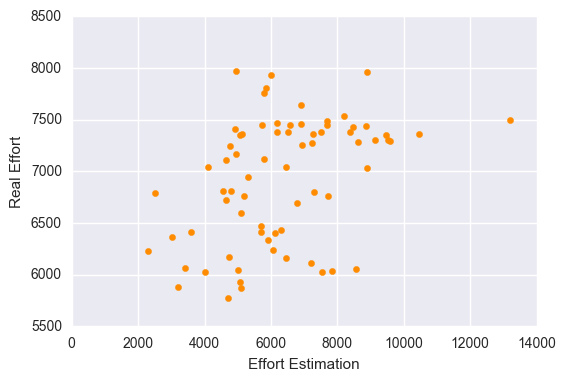

In [15]:
plt.scatter(X, y, color='darkorange', label='data')
plt.xlabel('Effort Estimation')
plt.ylabel('Real Effort')
plt

In [16]:
# df['Log_Real'] = df['Real_Effort_Person_Hours'].apply(lambda x: np.log(x+1))
# df[['Effort_Estimation', 'Log_Real']].sort_values(by='Effort_Estimation', ascending=True).head()

In [17]:
# df['Real_Effort_Person_Hours'].hist()
# sns.distplot(df['Log_Real'], bins=20)

## Machine Learning

In [21]:
svr_lin = SVR(kernel='linear', C=1e3)
lin_reg = linear_model.LinearRegression()

# y_svr = svr_lin.fit(X, y).predict(X)
y_lin = lin_reg.fit(X, y).predict(X)

<module 'matplotlib.pyplot' from 'C:\Program Files\Anaconda2\lib\site-packages\matplotlib\pyplot.py'>

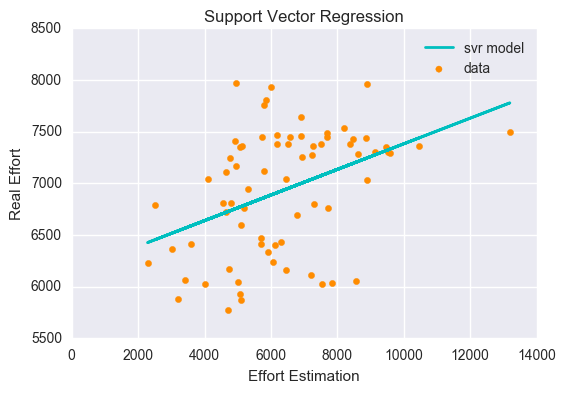

In [24]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_lin, color='c', lw=lw, label='svr model')
plt.xlabel('Effort Estimation')
plt.ylabel('Real Effort')
plt.title('Support Vector Regression')
plt.legend()
plt

In [20]:
prd = np.array([[1000]])
y_predict = lin_reg.predict(prd)
int(round(y_predict))

6267